In [206]:
#Import the necessary libraries:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt


In [242]:
!pip install --upgrade matplotlib

### Exploratory Data Analysis (EDA)

In [207]:
data=pd.read_csv("/content/CAR DETAILS (1).csv")
data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [208]:

data2=data.nlargest(n=5,columns=['selling_price'])
data2=data2.set_index('name')
data2

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
name,,,,,,,
Audi RS7 2015-2019 Sportback Performance,2016,8900000,13000,Petrol,Dealer,Automatic,First Owner
Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner
Mercedes-Benz GLS 2016-2020 350d 4MATIC,2016,5500000,77350,Diesel,Dealer,Automatic,First Owner
BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner


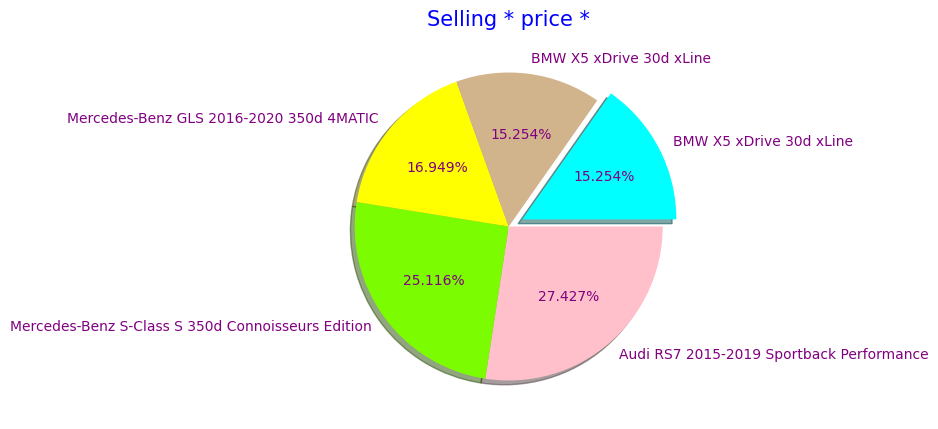

In [209]:
plt.figure(figsize=(5,5))
plt.pie(x=data2['selling_price'],labels=data2.index,
         colors=['pink','lawngreen','yellow','tan','cyan'],autopct='%.3f%%',
        explode=(0,0,0,0,0.1),shadow=True,counterclock=False,textprops=dict(color='Purple'))
plt.title('Selling * price *',fontsize=15,color='blue')
plt.show()

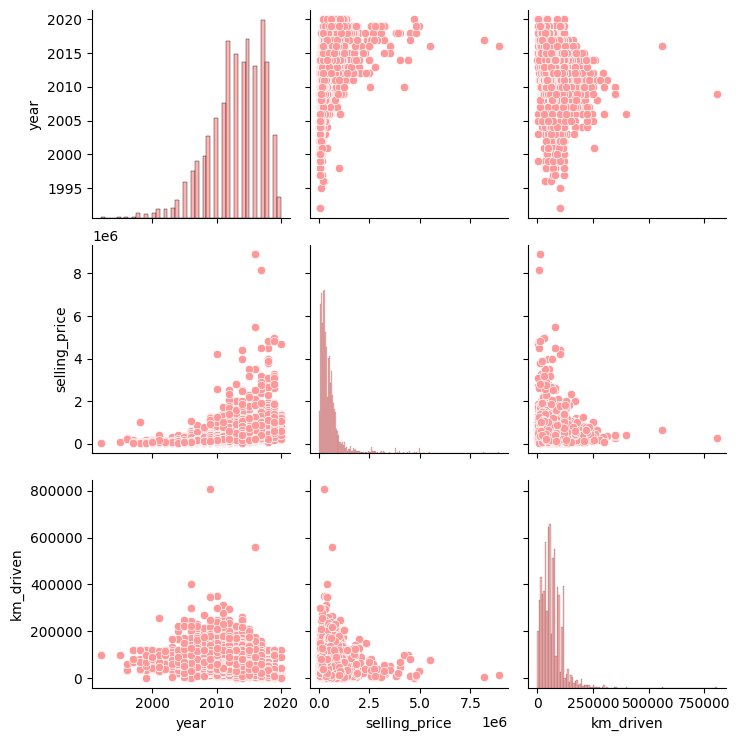

In [210]:
sns.pairplot(data)
# This shows the relationship for (n,2) combination of variable in a DataFrame
# as a matrix of plots and the diagonal plots are the univariate plots.

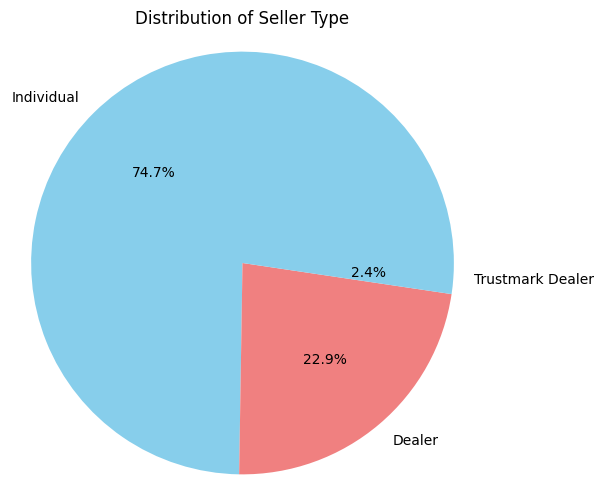

In [211]:
seller_type_counts = data['seller_type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(seller_type_counts, labels=seller_type_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Seller Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [212]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [213]:
x=data.loc[:,['name', 'year', 'selling_price', 'km_driven']]

In [214]:
x.head(10)

,name,year,selling_price,km_driven
0,Maruti 800 AC,2007,60000,70000
1,Maruti Wagon R LXI Minor,2007,135000,50000
2,Hyundai Verna 1.6 SX,2012,600000,100000
3,Datsun RediGO T Option,2017,250000,46000
4,Honda Amaze VX i-DTEC,2014,450000,141000
5,Maruti Alto LX BSIII,2007,140000,125000
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000
7,Tata Indigo Grand Petrol,2014,240000,60000
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000
9,Maruti Celerio Green VXI,2017,365000,78000


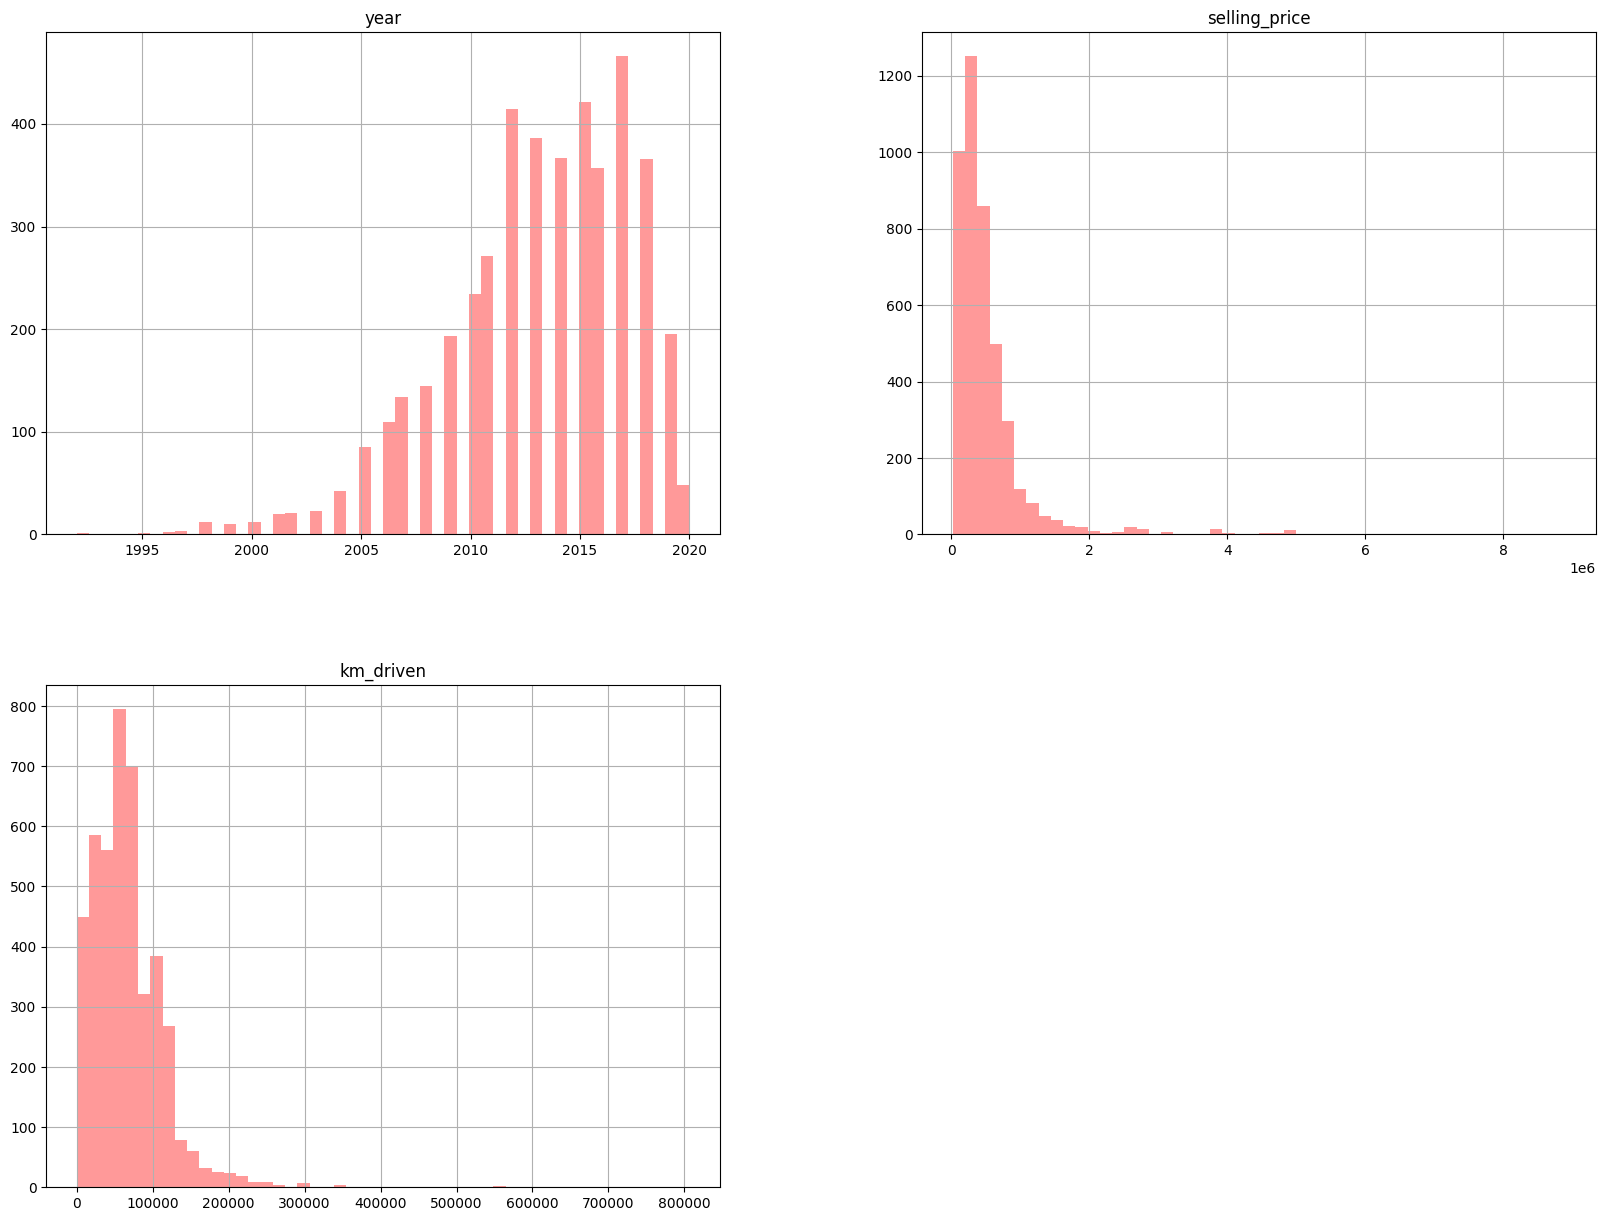

In [215]:

x.hist(bins=50,figsize=(20,15))#visualize data
plt.show()

2. Download the CAR DETAILS dataset and perform Data cleaning
and Data Pre-Processing if Necessary.


4. Perform Exploratory data analysis (EDA) on the Data and perform
Graphical Analysis on the Data. Include the graphs with

conclusions from the Graphical Analysis.


In [216]:
print(data.isnull().sum())

# Handling null values for 'transmission' column by filling with the most frequent value
most_frequent_transmission = data['transmission'].mode()[0]
data['transmission'].fillna(most_frequent_transmission, inplace=True)

# Checking if null values are handled
print(data.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [217]:
# No null values are present in this dataset
missing_values_count = data.isnull().sum()

# Display the number of missing values for each column
print(missing_values_count)



name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [218]:
print(missing_values_count.dropna())
print("No null values are present in this dataset")

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64
No null values are present in this dataset


In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
from mpl_toolkits.mplot3d import Axes3D

In [222]:
data.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner


In [223]:
import ipywidgets as widgets
from IPython.display import display

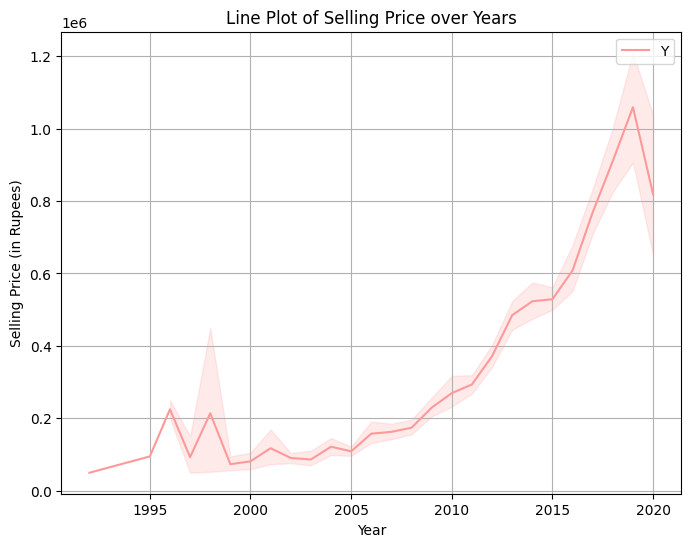

In [224]:
# Line Plot of Selling Price over Years
plt.figure(figsize=(8, 6))
sns.lineplot(x='year', y='selling_price', data=data)
plt.title('Line Plot of Selling Price over Years')
plt.xlabel('Year')
plt.ylabel('Selling Price (in Rupees)')
plt.grid()
plt.legend('Y')
plt.show()



In [225]:

# Function to update the plot based on custom controls
def update_plot(year_filter):
    plt.figure(figsize=(8, 6))
    filtered_data = data[data['year'] >= year_filter]
    sns.scatterplot(data=filtered_data, x='km_driven', y='selling_price', hue='fuel', palette='Set1', s=80, edgecolor='k', alpha=0.7)
    plt.xlabel('km_driven')
    plt.ylabel('Price')
    plt.title('Scatter Plot: Price vs. km_driven (Filtered by Year)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# Custom control: Slider to filter data by year
year_slider = widgets.IntSlider(min=min(data['year']), max=max(data['year']), step=1, value=min(data['year']), description='Filter by Year:')
widgets.interactive(update_plot, year_filter=year_slider)

interactive(children=(IntSlider(value=1992, description='Filter by Year:', max=2020, min=1992), Output()), _do…

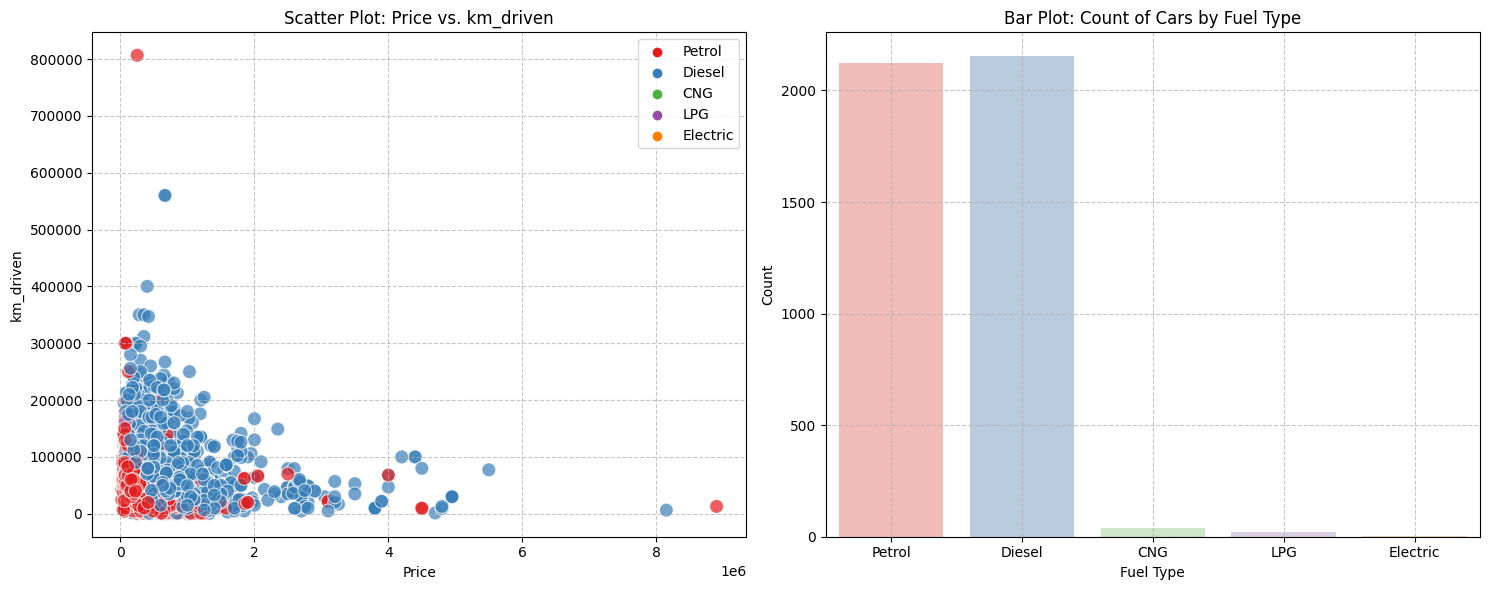

In [226]:

# Create mixed subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Scatter Plot for 'Price' and 'km_driven'
sns.scatterplot(data=data, x='selling_price', y='km_driven', hue='fuel', ax=axes[0], palette='Set1', s=100, alpha=0.7)
axes[0].set_xlabel('Price')
axes[0].set_ylabel('km_driven')
axes[0].set_title('Scatter Plot: Price vs. km_driven')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].legend()

# Subplot 2: Bar Plot for Count of Cars by 'Fuel'
sns.countplot(data=data, x='fuel', ax=axes[1], palette='Pastel1')
axes[1].set_xlabel('Fuel Type')
axes[1].set_ylabel('Count')
axes[1].set_title('Bar Plot: Count of Cars by Fuel Type')
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

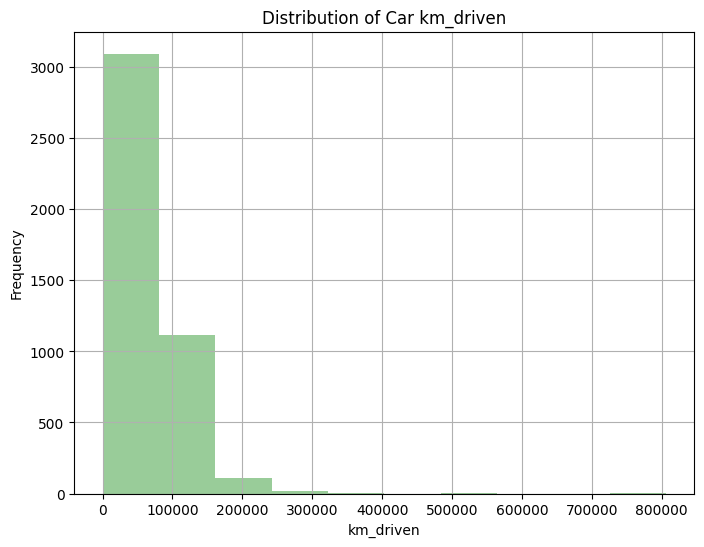

In [227]:
# Distplot for 'km_driven'
plt.figure(figsize=(8, 6))
sns.distplot(data['km_driven'], kde=False, color='green', bins=10)
plt.xlabel('km_driven')
plt.ylabel('Frequency')
plt.title('Distribution of Car km_driven')
plt.grid()
plt.show()

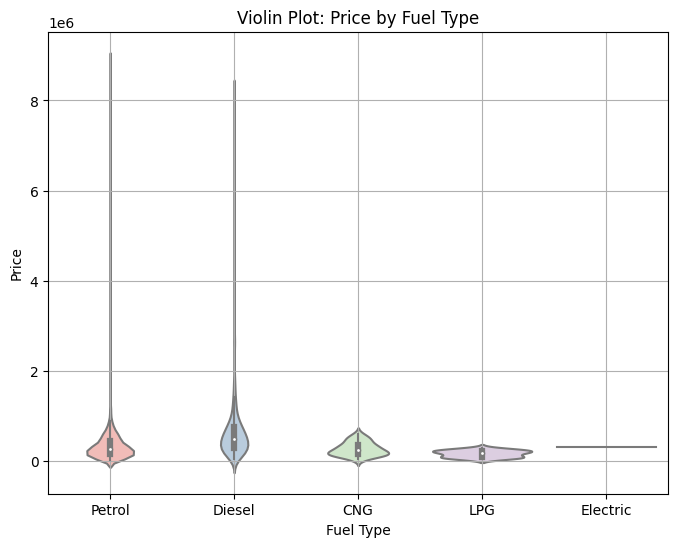

In [228]:
# Violin Plot for 'Price' by 'Fuel'
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='fuel', y='selling_price', palette='Pastel1')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Violin Plot: Price by Fuel Type')
plt.grid()
plt.show()


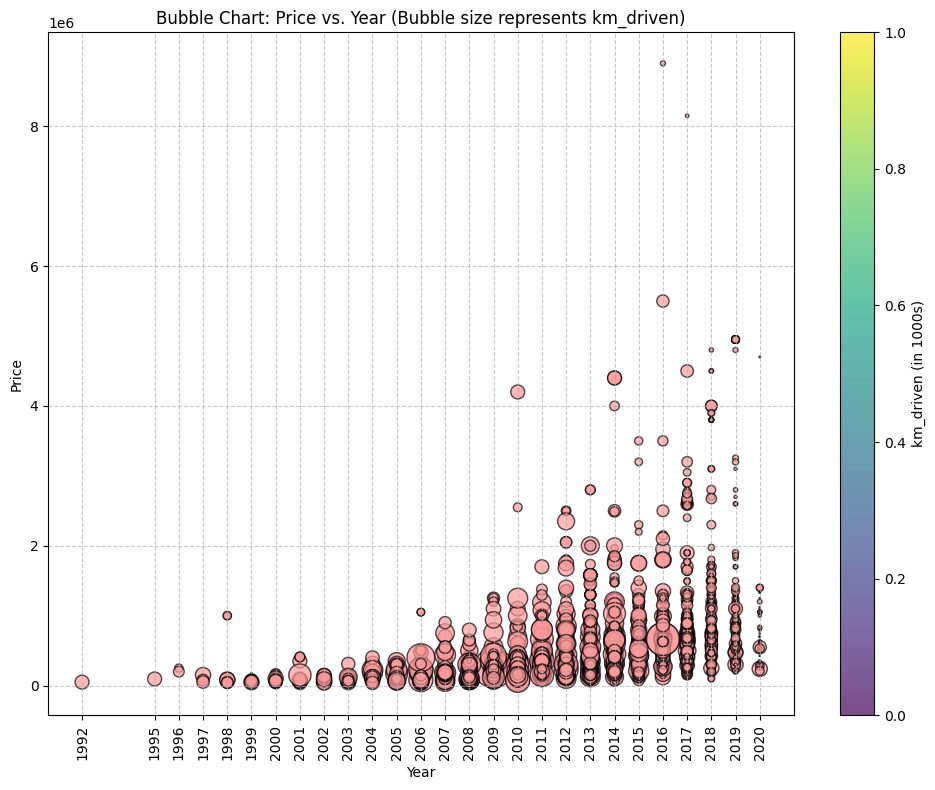

In [229]:

# Create the bubble chart
plt.figure(figsize=(10, 8))
plt.scatter(data['year'], data['selling_price'], s=data['km_driven'] / 1000, alpha=0.7, edgecolors='black')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Bubble Chart: Price vs. Year (Bubble size represents km_driven)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(data['year'].unique())
plt.xticks(rotation=90)
plt.colorbar(label='km_driven (in 1000s)')
plt.tight_layout()

plt.show()



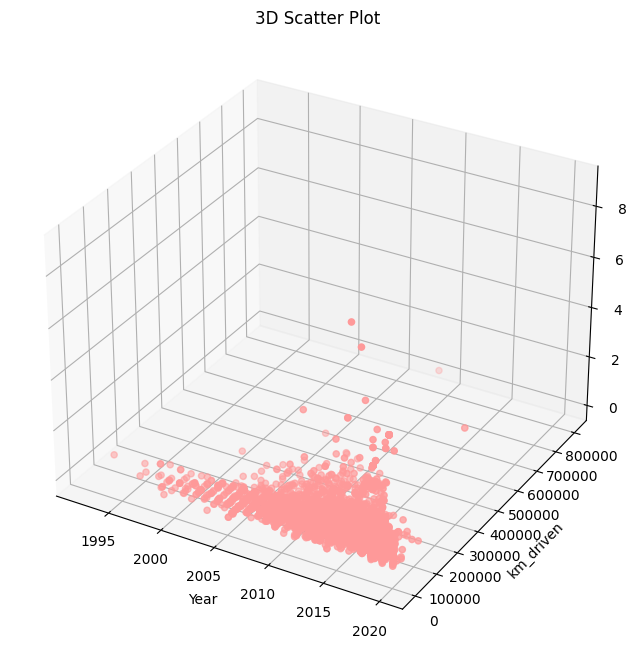

In [230]:
# Set a custom color for all points
point_color = "#ff9999"

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['year'],data['km_driven'],data['selling_price'], c=point_color, marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('km_driven')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot')

plt.show()


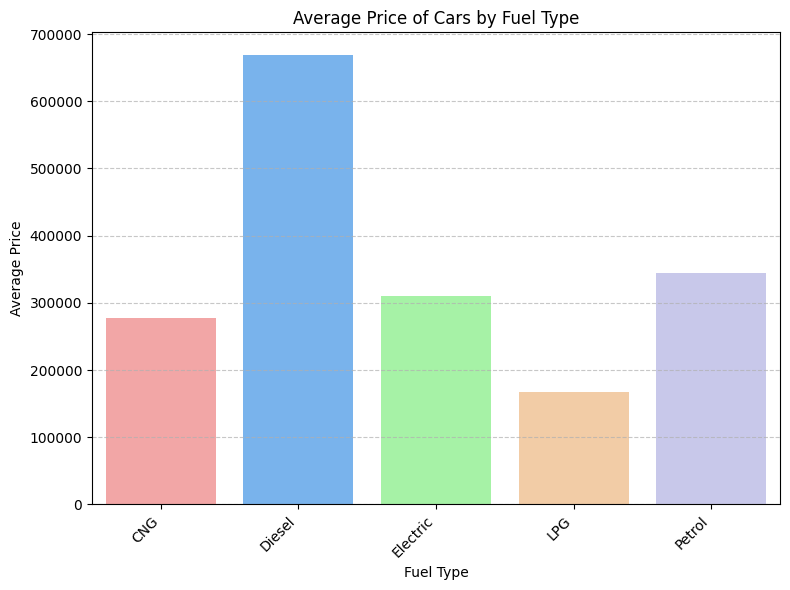

In [231]:
# Set a custom color palette
custom_palette = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0"]
sns.set_palette(custom_palette)

# Calculate the average price of cars by fuel type
average_price_by_fuel = data.groupby('fuel')['selling_price'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=average_price_by_fuel, x='fuel', y='selling_price', palette=custom_palette)
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.title('Average Price of Cars by Fuel Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better padding
plt.show()








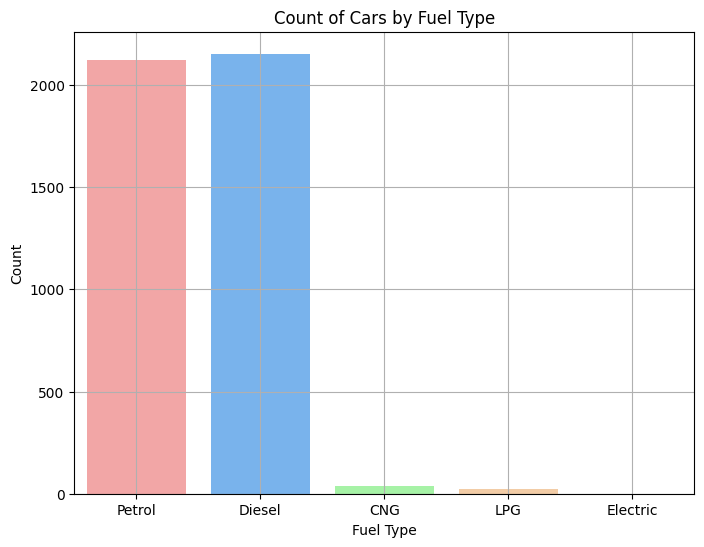

In [232]:

import seaborn as sns


# Assume you have already created the 'data' DataFrame as shown in the previous example

# Groupby plot using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='fuel', data=data)
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Count of Cars by Fuel Type')
plt.grid()
plt.show()


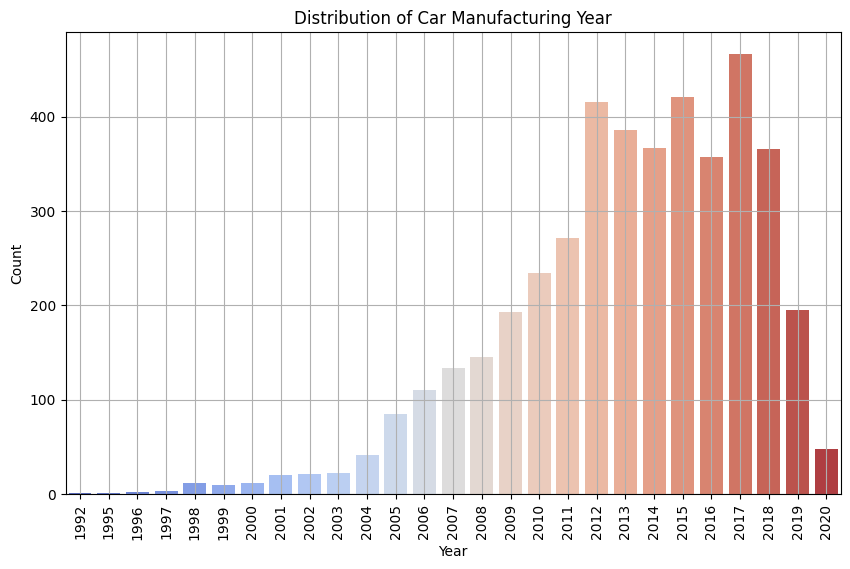

In [233]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=data, palette='coolwarm')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Car Manufacturing Year')
plt.xticks(rotation=90)  # To rotate the x-axis labels for better visibility
plt.grid()
plt.show()

In [234]:
df = pd.DataFrame(data)

# Count of cars for each owner type
owner_counts = df['owner'].value_counts()

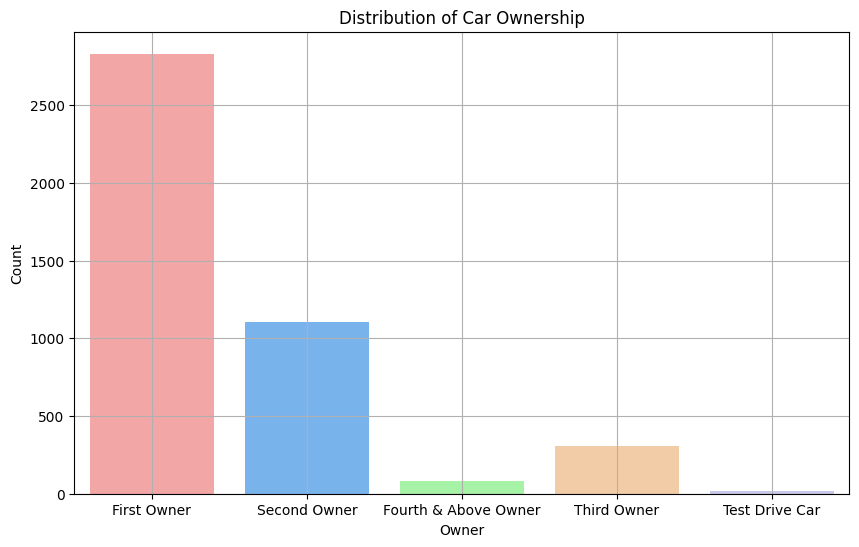

In [235]:


# Categorical Feature Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='owner', data=data)
plt.xlabel('Owner')
plt.ylabel('Count')
plt.title('Distribution of Car Ownership')
plt.grid()
plt.show()


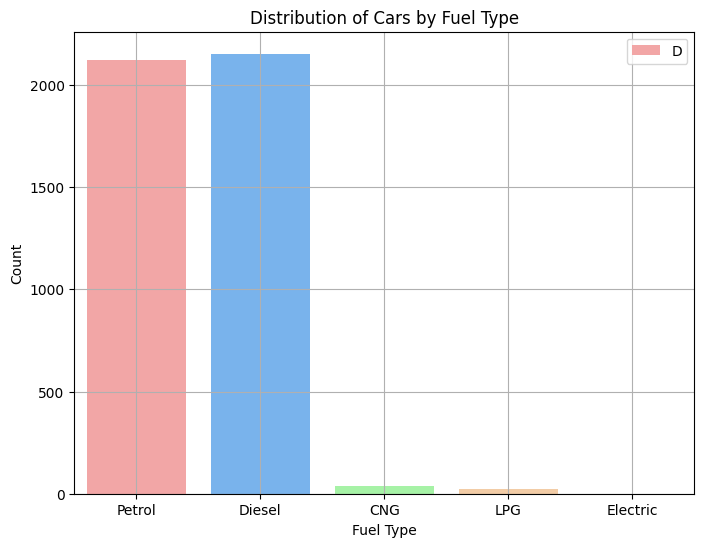

In [236]:
# Visualize the count of cars based on the fuel type using a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='fuel', data=data)
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Distribution of Cars by Fuel Type')
plt.grid()
plt.legend('Distribution')
plt.show()

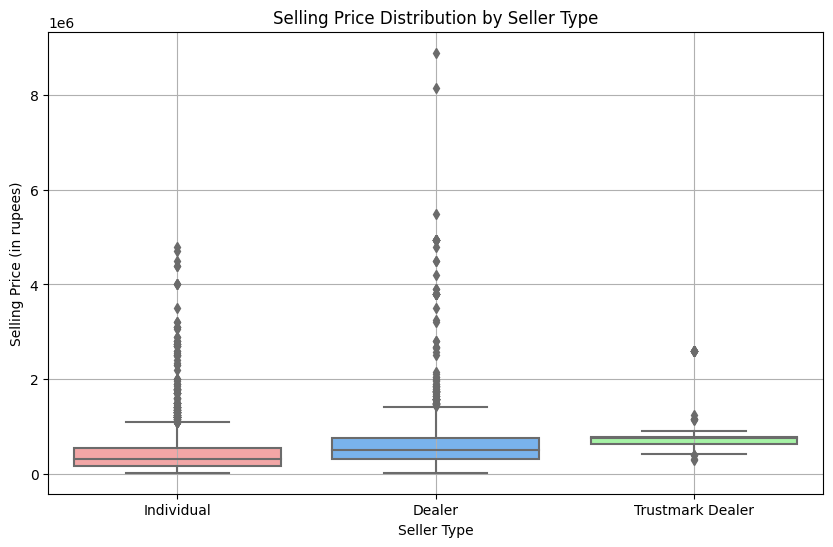

In [237]:
# Visualize the distribution of selling prices based on the seller_type using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='seller_type', y='selling_price', data=data)
plt.xlabel('Seller Type')
plt.ylabel('Selling Price (in rupees)')
plt.title('Selling Price Distribution by Seller Type')
plt.grid()
plt.show()

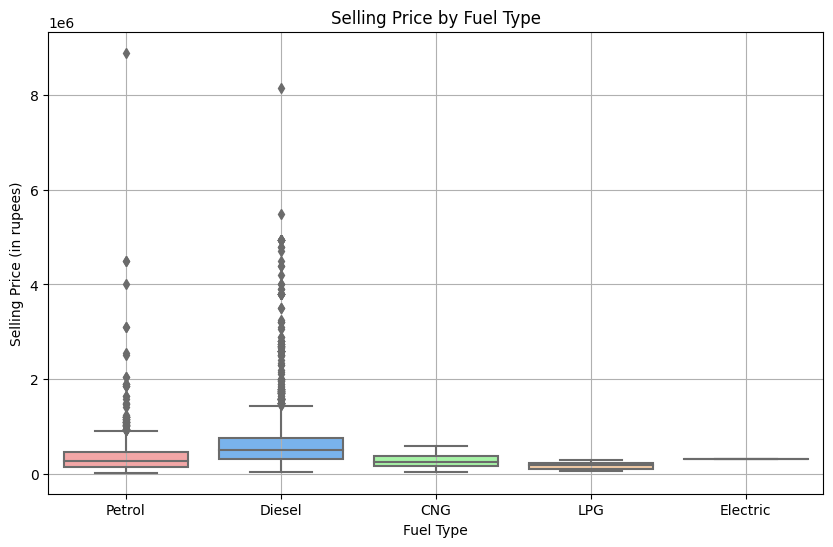

In [238]:


plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=data)
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price (in rupees)')
plt.title('Selling Price by Fuel Type')
plt.grid()
plt.show()


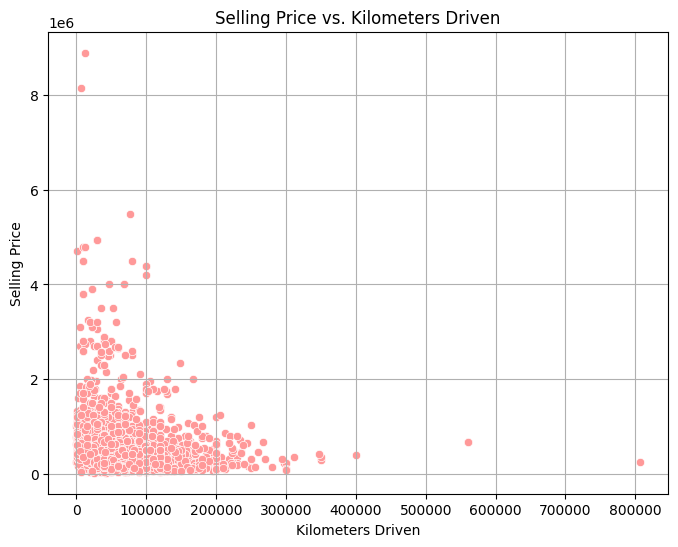

In [239]:
# Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='km_driven', y='selling_price')
plt.title('Selling Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.grid()
plt.show()

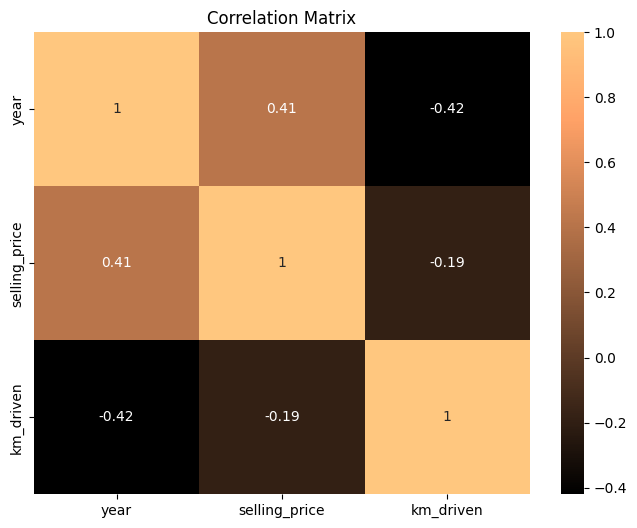

In [241]:
# Compute the correlation matrix for numerical columns
correlation_matrix = data[['year','selling_price','km_driven']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='copper')
plt.title('Correlation Matrix')
plt.show()


1. Data Understanding: Explored dataset contents, column meanings, and data types. Cleaned data, handled missing values, and converted data if necessary.

2. Summary Statistics: Calculated basic statistics like mean, minimum, maximum to understand numerical data characteristics.

3. Data Visualization: Used various visual plots like bar charts, histograms, box plots, scatter plots, and correlation matrices to identify patterns and relationships between variables.

4. Data Distributions: Examined data spread, detected outliers, and understood distribution patterns.

5. Relationships and Correlations: Explored variable relationships using scatter plots and correlation matrices.

6. Group Comparisons: Compared data between categories using plots and summary statistics.

7. Feature Importance: Identified crucial features influencing predictive modeling outcomes.

8. Outlier Detection: Detected and handled outliers, accounting for errors or special cases.

9. Data Preprocessing: Prepared data for analysis by scaling, encoding categorical variables, and handling imbalanced data.

10. Hypothesis Generation: Formulated initial hypotheses for further testing with statistical methods or machine learning models.